### HIPÓTESIS
hipotesis_1 = "Hay mucha demanda de ayudas y servicios sociales en determinados distritos (valorar si es en todos) y poco personal para absorber esta demanda"

hipotesis_2 = "Valorar si hay suficientes recursos no humanos para atender las demandas de los usuarios"

In [26]:
"""
IMPORTS
"""
import pandas as pd
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
import squarify
import folium 
from folium import plugins
import ipywidgets
import geocoder
import geopy
import numpy as np
from vega_datasets import data as vds
from branca.element import Figure
import re
from datetime import datetime


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

### 1.- Obtención de los datos

La fuente principal de todos los datos obtenidos ha sido a través de las páginas del ayuntamiento de Madrid (MUNIMADRID y PORTAL DE DATOS ABIERTOS DEL AYUNTAMIENTO DE MADRID)

In [ ]:
# guarda en variables los datasets y su fuente

# df_demandas = pd.DataFrame()
# URL_demandas_de_servicio="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=40ab4e8b0327d610VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
# Solicitudes de procesos solicitados por los usuarios

# df_urgencias = pd.DataFrame()
# URL_urgencias_atendidas="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=0b006dace9578610VgnVCM1000001d4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
# URGENCIAS ATENDIDAS EN LOS CENTROS. ESTAS URGENCIAS SON DE LA SIGUIENTES TIPOLOGIAS 
# Malos tratos                                      --      Código: 10
# Abandono                                          --      Código: 20
# Alojamiento/Vivienda                              --      Código: 30
# Desprotección social problema salud               --      Código: 40
# Desprotección socio-familiar                      --      Código: 50

# df_centros_sociales = pd.DataFrame()
# URL_centros_sociales="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=7c123e08dafc8410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
# Listado con geoposicionamiento de los diferentes centros sociales que se encuentran en Madrid, tanto del ayuntamiento como otros que no son del ayuntamiento (por ejemplo el Centro de Atención Social del "Casino de la Reina").


# OTROS POSIBLES DF QUE PUDIERA NECESITAR:
#URL_datos_abiertos_madrid="https://datos.madrid.es/portal/site/egob/menuitem.9e1e2f6404558187cf35cf3584f1a5a0/?vgnextoid=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
#URL_ayudas_sociales="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=00937b777f8ea610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"
#URL_ranking_vulnerabilidad="https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=d029ed1e80d38610VgnVCM2000001f4a900aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default"


### 2.- Extraccion de datos de los diferentes Datasets y almacenamiento en nuevo fichero situado en data\Outcomes

Vamos a tomar los datos de los años desde el 2019 al 2021, ya que los datos a día de hoy de 2022 están actualizados solo hasta abril, por lo que podría provocar errores en la preparación de los módelos.

In [28]:
df_2021=pd.read_csv("E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Incomes\servicios_sociales_urgencias_2021.csv",sep=';',encoding='ISO-8859-1',index_col='Secuencia')   
#Este  dataset solo contine información hasta julio de 2021
df_2020=pd.read_csv("E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Incomes\servicios_sociales_urgencias_2020.csv",sep=';',encoding='utf-8',index_col='Secuencia')

df_2019=pd.read_csv("E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Incomes\servicios_sociales_urgencias_2019.csv",sep=';',encoding='ISO-8859-1',index_col='Secuencia')

df_2018=pd.read_csv("E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Incomes\servicios_sociales_urgencias_2018.csv",sep=';',encoding='ISO-8859-1',index_col='Secuencia')

In [29]:
df_urgencias=pd.concat([df_2021,df_2020,df_2019,df_2018], ignore_index=True)
df_urgencias

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Código Distrito,Distrito,Código Barrio,Barrio,Sección Censal,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Código Tipo Supuesto Urgente,Tipo Supuesto Urgente,Fecha Cita
0,83,CSS Zaida,11,CARABANCHEL,11,CARABANCHEL,1103,SAN ISIDRO,060,25 - 29,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021
1,83,CSS Zaida,11,CARABANCHEL,11,CARABANCHEL,1104,VISTA ALEGRE,083,30 - 34,Española,M,1,Primera Atención,30.0,Alojamiento/Vivienda,04/01/2021
2,74,CSS Santa Hortensia,5,CHAMARTÍN,05,CHAMARTÍN,0503,CIUDAD JARDIN,043,70 - 74,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021
3,91,CSS Luis Vives,15,CIUDAD LINEAL,15,CIUDAD LINEAL,1503,QUINTANA,098,25 - 29,Extranjera,H,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021
4,80,CSS Gallur,10,LATINA,10,LATINA,1003,LUCERO,068,>= 85,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37901,98,CSS Pablo Casals,20,SAN BLAS-CANILLEJAS,20,SAN BLAS-CANILLEJAS,2004,ARCOS,48,30 - 34,Española,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018
37902,85,CSS Loyola de Palacio,12,USERA,12,USERA,1203,SAN FERMIN,100,>= 85,Española,M,2,Zona / Historia Social,40.0,Desproteccion social problema salud,28/12/2018
37903,84,CSS San Filiberto,12,USERA,12,USERA,1205,MOSCARDO,53,35 - 39,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018
37904,84,CSS San Filiberto,12,USERA,12,USERA,1205,MOSCARDO,74,65 - 69,Española,H,1,Primera Atención,30.0,Alojamiento/Vivienda,28/12/2018


In [30]:
df_urgencias.drop(['Código Distrito','Distrito','Código Barrio','Barrio','Sección Censal'],axis=1,inplace=True)             #   Eliminamos las variables que no vamos a utilizar
df_urgencias

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Código Tipo Supuesto Urgente,Tipo Supuesto Urgente,Fecha Cita
0,83,CSS Zaida,11,CARABANCHEL,25 - 29,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021
1,83,CSS Zaida,11,CARABANCHEL,30 - 34,Española,M,1,Primera Atención,30.0,Alojamiento/Vivienda,04/01/2021
2,74,CSS Santa Hortensia,5,CHAMARTÍN,70 - 74,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021
3,91,CSS Luis Vives,15,CIUDAD LINEAL,25 - 29,Extranjera,H,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021
4,80,CSS Gallur,10,LATINA,>= 85,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021
...,...,...,...,...,...,...,...,...,...,...,...,...
37901,98,CSS Pablo Casals,20,SAN BLAS-CANILLEJAS,30 - 34,Española,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018
37902,85,CSS Loyola de Palacio,12,USERA,>= 85,Española,M,2,Zona / Historia Social,40.0,Desproteccion social problema salud,28/12/2018
37903,84,CSS San Filiberto,12,USERA,35 - 39,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018
37904,84,CSS San Filiberto,12,USERA,65 - 69,Española,H,1,Primera Atención,30.0,Alojamiento/Vivienda,28/12/2018


En este DataFrame se observa  que hay bastantes datos nulos, que no han sido rellenados.

Los datos son los de 'tramo de edad', 'sexo' y 'nacionalidad' (española/extranjera), que hay que ir rellenando.

Tomaré como referencia en función de cada distrito los datos de otros Datasets disponibles para ajustar estos datos.

In [31]:
df_urgencias.to_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Outcomes\df_urgencias.csv',header=True,index=False)

### 3.- Featuring Engineering

Vamos a agrupar las __fechas de edades__ para tener un rango más manejable.

Así agruparemos < 18 años a todos los grupos que sean inferiores a esta edad.

Agruparemos >65 a todos los grupos que sean superiores a esta edad.

Agruparemos de 10 en 10 años al resto.

In [32]:
df_urgencias= pd.read_csv("E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Outcomes\df_urgencias.csv",sep=',')
df_urgencias

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Código Tipo Supuesto Urgente,Tipo Supuesto Urgente,Fecha Cita
0,83,CSS Zaida,11,CARABANCHEL,25 - 29,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021
1,83,CSS Zaida,11,CARABANCHEL,30 - 34,Española,M,1,Primera Atención,30.0,Alojamiento/Vivienda,04/01/2021
2,74,CSS Santa Hortensia,5,CHAMARTÍN,70 - 74,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021
3,91,CSS Luis Vives,15,CIUDAD LINEAL,25 - 29,Extranjera,H,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021
4,80,CSS Gallur,10,LATINA,>= 85,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021
...,...,...,...,...,...,...,...,...,...,...,...,...
37901,98,CSS Pablo Casals,20,SAN BLAS-CANILLEJAS,30 - 34,Española,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018
37902,85,CSS Loyola de Palacio,12,USERA,>= 85,Española,M,2,Zona / Historia Social,40.0,Desproteccion social problema salud,28/12/2018
37903,84,CSS San Filiberto,12,USERA,35 - 39,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018
37904,84,CSS San Filiberto,12,USERA,65 - 69,Española,H,1,Primera Atención,30.0,Alojamiento/Vivienda,28/12/2018


Hay que eliminar los espacios en blanco entre -

In [33]:
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace(' - ','-')
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace('- ','-')
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace('= ','=')
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A4-11", "<=18")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A12-17", "<=18")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A0-3", "<=18") 

df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A18-24", "19-29")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A25-29", "19-29")

df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A30-34", "30-39")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A35-39", "30-39")

df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A40-44", "40-49")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A44-49", "40-49")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A45-49", "40-49")

df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A50-54", "50-59")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A55-59", "50-59")

df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A60-64", "60-64")

df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A65-69", ">=65")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A75-79", ">=65")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A80-84", ">=65")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A70-74", ">=65")
df_urgencias['Tramo Edad']=df_urgencias['Tramo Edad'].str.replace("\A>=85", ">=65")

c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.
c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """
c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\Users\jtr_7\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: The default value of regex will change from True to False in a future ve

In [34]:
df_urgencias

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Código Tipo Supuesto Urgente,Tipo Supuesto Urgente,Fecha Cita
0,83,CSS Zaida,11,CARABANCHEL,19-29,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021
1,83,CSS Zaida,11,CARABANCHEL,30-39,Española,M,1,Primera Atención,30.0,Alojamiento/Vivienda,04/01/2021
2,74,CSS Santa Hortensia,5,CHAMARTÍN,>=65,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021
3,91,CSS Luis Vives,15,CIUDAD LINEAL,19-29,Extranjera,H,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021
4,80,CSS Gallur,10,LATINA,>=65,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021
...,...,...,...,...,...,...,...,...,...,...,...,...
37901,98,CSS Pablo Casals,20,SAN BLAS-CANILLEJAS,30-39,Española,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018
37902,85,CSS Loyola de Palacio,12,USERA,>=65,Española,M,2,Zona / Historia Social,40.0,Desproteccion social problema salud,28/12/2018
37903,84,CSS San Filiberto,12,USERA,30-39,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018
37904,84,CSS San Filiberto,12,USERA,>=65,Española,H,1,Primera Atención,30.0,Alojamiento/Vivienda,28/12/2018


In [35]:
df_urgencias['Tramo Edad'].unique()                 #Verificamos que se ha producido el agrupamiento deseado

array(['19-29', '30-39', '>=65', '40-49', '50-59', '<=18', '60-64', ' '],
      dtype=object)

In [36]:
df_urgencias['Tramo Edad'].value_counts()

>=65     11898
30-39     7673
40-49     7310
50-59     4684
19-29     4421
60-64     1634
<=18       212
            74
Name: Tramo Edad, dtype: int64

In [37]:
lista_rango_edad=df_urgencias['Tramo Edad'].unique()                  # Hay que revisar esto, porque no está ordenado y sería lo ideal
lista_rango_edad.sort()
mivalor = [ x for x in range(len(lista_rango_edad))]             ##  agregaremos una variable numérica para sustituir a los nombres de las cias
mivalor
lista_rango_edad=list(lista_rango_edad)                               ##  dejamos el valor cero por si en los datos a testear  hay algún NaN y 

Age_range_code = {k: v for k, v in zip(lista_rango_edad, mivalor)}   ##  sustituirlo por cero
Age_range_code
df_urgencias['Age_range_code']= df_urgencias['Tramo Edad'].map(Age_range_code)


Los valores son: {nulos: 0, 19-29: 1, 30-39: 2, 40-49: 3, 50-59: 4, 60-64: 5, <=18: 6, >=65: 7}

Vamos a dar un formato numérico a la __nacionalidad__ del usuario, siendo los valores: 

0 para Española, 1 para Extranjera

In [38]:
lista_nacionalidad=df_urgencias['Nacionalidad'].unique()
lista_nacionalidad.sort()
lista_nacionalidad
mivalor = [ x for x in range(len(lista_nacionalidad))]             ##  agregaremos una variable numérica para sustituir a los nombres de las cias
#mivalor    
lista_nacionalidad=list(lista_nacionalidad)                               ##  dejamos el valor cero por si en los datos a testear  hay algún NaN y 
Nationality_code = {k: v for k, v in zip(lista_nacionalidad, mivalor)}   ##  sustituirlo por cero
df_urgencias['Nationality_code']= df_urgencias['Nacionalidad'].map(Nationality_code)
df_urgencias

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Código Tipo Supuesto Urgente,Tipo Supuesto Urgente,Fecha Cita,Age_range_code,Nationality_code
0,83,CSS Zaida,11,CARABANCHEL,19-29,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021,1,2
1,83,CSS Zaida,11,CARABANCHEL,30-39,Española,M,1,Primera Atención,30.0,Alojamiento/Vivienda,04/01/2021,2,1
2,74,CSS Santa Hortensia,5,CHAMARTÍN,>=65,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021,7,1
3,91,CSS Luis Vives,15,CIUDAD LINEAL,19-29,Extranjera,H,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021,1,2
4,80,CSS Gallur,10,LATINA,>=65,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37901,98,CSS Pablo Casals,20,SAN BLAS-CANILLEJAS,30-39,Española,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018,2,1
37902,85,CSS Loyola de Palacio,12,USERA,>=65,Española,M,2,Zona / Historia Social,40.0,Desproteccion social problema salud,28/12/2018,7,1
37903,84,CSS San Filiberto,12,USERA,30-39,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018,2,2
37904,84,CSS San Filiberto,12,USERA,>=65,Española,H,1,Primera Atención,30.0,Alojamiento/Vivienda,28/12/2018,7,1


In [39]:
df_urgencias['Sexo'].value_counts()             #Solo hay 1 dato vacio en el DataFrame por lo que lo sustituiremos por M, que es la moda

M    26565
H    11339
         2
Name: Sexo, dtype: int64

In [40]:
df_urgencias['Sexo']=df_urgencias['Sexo'].mask(df_urgencias['Sexo'] == ' ').fillna('M')

Vamos a dar un formato numérico al __sexo__ del usuario, siendo los valores: 

0 para H, 1 para M

In [41]:
lista_sexo=df_urgencias['Sexo'].unique()
lista_sexo.sort()
lista_sexo
mivalor = [ x for x in range(len(lista_sexo))]             ##  agregaremos una variable numérica para sustituir a los nombres de las cias
#mivalor    
lista_sexo=list(lista_sexo)                               ##  dejamos el valor cero por si en los datos a testear  hay algún NaN y 

Sex_code = {k: v for k, v in zip(lista_sexo, mivalor)}   ##  sustituirlo por cero

df_urgencias['Sex_code']= df_urgencias['Sexo'].map(Sex_code)
df_urgencias

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Código Tipo Supuesto Urgente,Tipo Supuesto Urgente,Fecha Cita,Age_range_code,Nationality_code,Sex_code
0,83,CSS Zaida,11,CARABANCHEL,19-29,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021,1,2,1
1,83,CSS Zaida,11,CARABANCHEL,30-39,Española,M,1,Primera Atención,30.0,Alojamiento/Vivienda,04/01/2021,2,1,1
2,74,CSS Santa Hortensia,5,CHAMARTÍN,>=65,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021,7,1,1
3,91,CSS Luis Vives,15,CIUDAD LINEAL,19-29,Extranjera,H,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021,1,2,0
4,80,CSS Gallur,10,LATINA,>=65,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37901,98,CSS Pablo Casals,20,SAN BLAS-CANILLEJAS,30-39,Española,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018,2,1,1
37902,85,CSS Loyola de Palacio,12,USERA,>=65,Española,M,2,Zona / Historia Social,40.0,Desproteccion social problema salud,28/12/2018,7,1,1
37903,84,CSS San Filiberto,12,USERA,30-39,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018,2,2,1
37904,84,CSS San Filiberto,12,USERA,>=65,Española,H,1,Primera Atención,30.0,Alojamiento/Vivienda,28/12/2018,7,1,0


In [42]:
df_urgencias['Tipo Supuesto Urgente'].unique()          #   Vemos que hay valores nulos en el campo a valorar, por lo que vamos a ver cuantos son y ver la posibilidad de sustituirlos por otros.
                                                        #   Esto lo haremos en cada Dataset descargado para así que sea más "asumible" la tarea

array(['Alojamiento/Vivienda', 'Desproteccion social problema salud',
       'Desprotección socio-familiar', 'Malos Tratos', 'Abandono', nan],
      dtype=object)

In [43]:
df_urgencias['Tipo Supuesto Urgente'].isnull().sum()

2184

Se puede ver que hay muchos en esta columna con __NaN__ (2184).

Vamos a seguir realizando ingeniera de datos con este DataFrame y hacer un módelo, para posteriormente valorar si hay que hacer algún tipo de ingeniería de datos extra.

In [44]:
df_urgencias['Tipo Supuesto Urgente'].value_counts()

Desprotección socio-familiar           18066
Desproteccion social problema salud     9802
Alojamiento/Vivienda                    6886
Malos Tratos                             890
Abandono                                  78
Name: Tipo Supuesto Urgente, dtype: int64

Vamos a dar un formato de fecha año y trimestre a los valores de 'Fecha Demanda' para poder ver qué evolución tienen los datos en el tiempo

In [45]:
df_urgencias['Fecha Cita'] = pd.to_datetime(df_urgencias['Fecha Cita'], dayfirst=True)

df_urgencias['year'] = df_urgencias['Fecha Cita'].dt.year
#df_demandas['month'] = df_demandas['Timestamp'].dt.month
df_urgencias['Quarteryear'] = df_urgencias['Fecha Cita'].dt.quarter
df_urgencias


,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Código Tipo Supuesto Urgente,Tipo Supuesto Urgente,Fecha Cita,Age_range_code,Nationality_code,Sex_code,year,Quarteryear
0,83,CSS Zaida,11,CARABANCHEL,19-29,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,2021-01-04,1,2,1,2021,1
1,83,CSS Zaida,11,CARABANCHEL,30-39,Española,M,1,Primera Atención,30.0,Alojamiento/Vivienda,2021-01-04,2,1,1,2021,1
2,74,CSS Santa Hortensia,5,CHAMARTÍN,>=65,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,2021-01-04,7,1,1,2021,1
3,91,CSS Luis Vives,15,CIUDAD LINEAL,19-29,Extranjera,H,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,2021-01-04,1,2,0,2021,1
4,80,CSS Gallur,10,LATINA,>=65,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,2021-01-04,7,1,1,2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37901,98,CSS Pablo Casals,20,SAN BLAS-CANILLEJAS,30-39,Española,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,2018-12-28,2,1,1,2018,4
37902,85,CSS Loyola de Palacio,12,USERA,>=65,Española,M,2,Zona / Historia Social,40.0,Desproteccion social problema salud,2018-12-28,7,1,1,2018,4
37903,84,CSS San Filiberto,12,USERA,30-39,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,2018-12-28,2,2,1,2018,4
37904,84,CSS San Filiberto,12,USERA,>=65,Española,H,1,Primera Atención,30.0,Alojamiento/Vivienda,2018-12-28,7,1,0,2018,4


In [46]:
df_urgencias_prueba=df_urgencias.drop(['Código Centro'],axis=1)

In [47]:
col = df_urgencias_prueba.pop('Código Tipo Supuesto Urgente')
df_urgencias_prueba.insert(loc= 0 , column= 'Código Tipo Supuesto Urgente', value= col)

In [48]:
df_urgencias_prueba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37906 entries, 0 to 37905
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Código Tipo Supuesto Urgente  35722 non-null  float64       
 1   Centro                        37906 non-null  object        
 2   Código Distrito Centro        37906 non-null  int64         
 3   Distrito Centro               37906 non-null  object        
 4   Tramo Edad                    37906 non-null  object        
 5   Nacionalidad                  37906 non-null  object        
 6   Sexo                          37906 non-null  object        
 7   Código Tipo Atención          37906 non-null  int64         
 8   Tipo Atención                 37906 non-null  object        
 9   Tipo Supuesto Urgente         35722 non-null  object        
 10  Fecha Cita                    37906 non-null  datetime64[ns]
 11  Age_range_code              

In [49]:
df_urgencias_prueba.to_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Outcomes\df_urgencias_prueba.csv',header=True,index=False)

### 4.- Exploring Graphics

Vamos a hacer unas gráficas para valorar los datos que disponemos.

Más gráficas en __Tableau__

<AxesSubplot:>

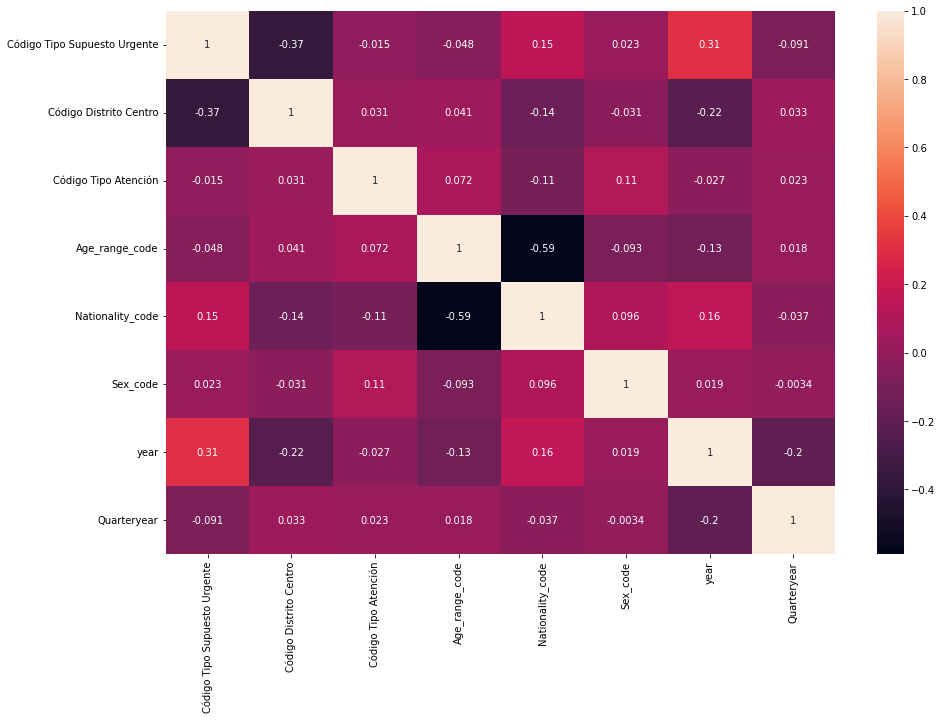

In [50]:
plt.figure(figsize=(15,10))
sns.heatmap(df_urgencias_prueba.corr(), annot=True)

Se observa que hay cierta correlación entre los parámetros de **year**, **Nationality_code**,**Código Distrito Centro**.

También se observa que no hay aparente correlación con los parámetros **Código Tipo Atención**,**Age_range_code** y **Sex_code**.

**year** también parece tener correlación con otros parámetros como **Nationality_code** o **Código Distrito centro**.

**Nationality code** y **Age_range_code** parece que también tiene una cierta correlación.


<Figure size 1080x720 with 0 Axes>

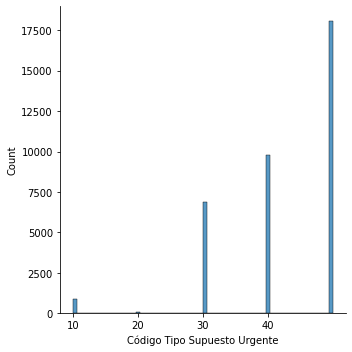

In [51]:
plt.figure(figsize=(15,10))
sns.displot(df_urgencias_prueba['Código Tipo Supuesto Urgente'])
plt.xticks(np.arange(10,50,step=10));

### 5.- My first Model (linearRegression)

In [52]:
df_urgencias['Código Tipo Supuesto Urgente']=df_urgencias['Código Tipo Supuesto Urgente'].mask(df_urgencias['Código Tipo Supuesto Urgente'] == ' ').fillna(0)
#   He añadido este codigo para ver si conseguia hacer que funcionará el modelo, al haber NaN en y

In [53]:
X=df_urgencias_prueba[['Código Distrito Centro','Age_range_code','Nationality_code','Sex_code','year']]
y=df_urgencias_prueba['Código Tipo Supuesto Urgente']

In [54]:

lin_reg = LinearRegression()   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
lin_reg.fit(X_train, y_train)                           #   Entrenas/generas el modelo para determinar los coeficientes

print("Estos son los datos del test y del target:\n-----")
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)  

#    print("Estos son los datos del valor de y en x=0 y de las pendientes de cada gradiente de las variables:\n-----")
#    print(lin_reg.intercept_)
#    print(lin_reg.coef_)
coeff_df = pd.DataFrame(lin_reg.coef_,
                            X.columns,
                            columns=['Coefficient'])
print("Estos son las pendientes de cada gradiente visto en un Dataframe:\n-----")
print(coeff_df)

predictions = lin_reg.predict(X_test)                   #   Determino los resultados que deberían de dar con los valores guardados para
print("El factor de correlacion de la regresión es: ",lin_reg.score(X_test, y_test))
print("Errores de las predicciones:\n---")
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("\nErrores de los tests\n---")
print('MAE:', metrics.mean_absolute_error(y_train, lin_reg.predict(X_train)))
print('MAPE:', metrics.mean_absolute_percentage_error(y_train, lin_reg.predict(X_train)))
print('MSE:', metrics.mean_squared_error(y_train, lin_reg.predict(X_train)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, lin_reg.predict(X_train))))

print("Esta es la importancia de las variables:\n-----")
features = pd.DataFrame(lin_reg.coef_, X_train.columns, columns=['coefficient'])
print(features.head().sort_values('coefficient', ascending=False))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

Como se puede ver __no se puede realizar un módelo de regresión lineal__ (ni cualquier otro módelo de este tipo), ya que hay datos NaN en la variable dependiente que hay que resolver.

Para ello vamos a realizar una ingeniería de datos para sustituir estos valores NaN.

Dada la gran cantidad de valores, con el fin que sea más representativos y afecten menos a la variabilidad que pudiera surgir, __realizaremos estas sustituciones en los Datasets originales__ y volveremos a realizar todo el proceso.

En este Notebook, realizaremos el proceso y continuaremos en el siguiente Notebook con todo el proceso de ingenieria de datos anterior para poder ver si se puede representar y qué resultados no da el módelo inicial.

### 6.- Reconstruction Dataframes

In [55]:
df_2021_correccion=df_2021
df_2021_correccion.describe(include='all')                  #   Vamos a ver las características de las columnas 'Código Tipo Supuesto Urgente' y 'Tipo Supuesto Urgente',
                                                            #   que están relacionadas entre sí y dónde están los valores NaN que hay que sustituir.

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Código Distrito,Distrito,Código Barrio,Barrio,Sección Censal,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Código Tipo Supuesto Urgente,Tipo Supuesto Urgente,Fecha Cita
count,2626.000000,2626,2626.000000,2626,2626,2626,2626,2626,2626,2626,2626,2626,2626.000000,2626,2460.000000,2460,2626
unique,NaN,38,NaN,21,22,22,123,123,213,18,3,3,NaN,3,NaN,5,134
top,NaN,CSS San Diego,NaN,PUENTE DE VALLECAS,13,PUENTE DE VALLECAS,1302,SAN DIEGO,063,>= 85,Española,M,NaN,Zona / Historia Social,NaN,Desproteccion social problema salud,28/06/2021
freq,NaN,242,NaN,429,426,426,161,161,32,473,1696,1718,NaN,1555,NaN,1069,40
mean,87.120716,NaN,10.778370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.580350,NaN,35.674797,NaN,NaN
std,11.616322,NaN,4.684117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.516968,NaN,8.886337,NaN,NaN
min,69.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,10.000000,NaN,NaN
25%,78.000000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,30.000000,NaN,NaN
50%,86.000000,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,40.000000,NaN,NaN
75%,93.000000,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,40.000000,NaN,NaN


In [56]:
print("Los valores NaN que hay en este Dataset son: ",df_2021['Código Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2021))
df_2021['Código Tipo Supuesto Urgente'].value_counts()

Los valores NaN que hay en este Dataset son:  166
Los registros que hay en este DataSet son:  2626


40.0    1069
30.0     968
50.0     291
10.0     123
20.0       9
Name: Código Tipo Supuesto Urgente, dtype: int64

En este Dataframe vemos que la media de **'Código Tipo Supuesto Urgente'** se aproxima a la mediana.

Este tipo de dato, aunque es numérico, es categorico y solo tienen valores de 10,20,30,40 y 50.

Hay 166 datos vacíos, los rellenaremos con los datos del registro anterior.

In [57]:
df_2021_correccion['Código Tipo Supuesto Urgente'].fillna(method="ffill",inplace=True)
df_2021_correccion['Tipo Supuesto Urgente'].fillna(method="ffill",inplace=True)
'''Verificamos'''
print("Los valores NaN que hay en este Dataset son: ",df_2021_correccion['Código Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2021_correccion))
df_2021['Código Tipo Supuesto Urgente'].value_counts()
print("Los valores NaN que hay en este Dataset son: ",df_2021_correccion['Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2021_correccion))
df_2021_correccion['Tipo Supuesto Urgente'].value_counts()

Los valores NaN que hay en este Dataset son:  0
Los registros que hay en este DataSet son:  2626
Los valores NaN que hay en este Dataset son:  0
Los registros que hay en este DataSet son:  2626


Desproteccion social problema salud    1133
Alojamiento/Vivienda                   1037
Desprotección socio-familiar            312
Malos Tratos                            134
Abandono                                 10
Name: Tipo Supuesto Urgente, dtype: int64

In [58]:
df_2021_correccion.groupby('Código Tipo Supuesto Urgente')['Tipo Supuesto Urgente'].value_counts()

Código Tipo Supuesto Urgente  Tipo Supuesto Urgente              
10.0                          Malos Tratos                            134
20.0                          Abandono                                 10
30.0                          Alojamiento/Vivienda                   1037
40.0                          Desproteccion social problema salud    1133
50.0                          Desprotección socio-familiar            312
Name: Tipo Supuesto Urgente, dtype: int64

In [59]:
df_2020_correccion=df_2020
df_2020_correccion.describe(include='all')                  #   Vamos a ver las características de las columnas 'Código Tipo Supuesto Urgente' y 'Tipo Supuesto Urgente',
                                                            #   que están relacionadas entre sí y dónde están los valores NaN que hay que sustituir.

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Código Distrito,Distrito,Código Barrio,Barrio,Sección Censal,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Código Tipo Supuesto Urgente,Tipo Supuesto Urgente,Fecha Cita
count,24351.000000,24351,24351.000000,24351,24351.000000,24351,24351.000000,24351,24351.000000,24351,24351,24351,24351.000000,24351,22949.000000,22949,24351
unique,NaN,38,NaN,21,NaN,21,NaN,125,NaN,18,2,2,NaN,3,NaN,5,249
top,NaN,CSS María Zayas,NaN,TETUÁN,NaN,TETUÁN,NaN,VALDECEDERAS,NaN,40 - 44,Extranjera,M,NaN,Zona / Historia Social,NaN,Desprotección socio-familiar,20/04/2020
freq,NaN,6281,NaN,11884,NaN,11694,NaN,2691,NaN,3070,14944,17398,NaN,14257,NaN,16475,373
mean,85.428648,NaN,7.238799,NaN,7.319289,NaN,735.633773,NaN,72.913515,NaN,NaN,NaN,1.575418,NaN,45.991546,NaN,NaN
std,12.486296,NaN,2.878543,NaN,2.995551,NaN,299.596304,NaN,43.083262,NaN,NaN,NaN,0.514243,NaN,7.414501,NaN,NaN
min,69.000000,NaN,1.000000,NaN,1.000000,NaN,101.000000,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,10.000000,NaN,NaN
25%,75.000000,NaN,6.000000,NaN,6.000000,NaN,603.000000,NaN,36.000000,NaN,NaN,NaN,1.000000,NaN,40.000000,NaN,NaN
50%,77.000000,NaN,6.000000,NaN,6.000000,NaN,606.000000,NaN,75.000000,NaN,NaN,NaN,2.000000,NaN,50.000000,NaN,NaN
75%,101.000000,NaN,8.000000,NaN,8.000000,NaN,804.000000,NaN,105.000000,NaN,NaN,NaN,2.000000,NaN,50.000000,NaN,NaN


In [60]:
print("Los valores NaN que hay en este Dataset son: ",df_2020['Código Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2020))
df_2020['Código Tipo Supuesto Urgente'].value_counts()

Los valores NaN que hay en este Dataset son:  1402
Los registros que hay en este DataSet son:  24351


50.0    16475
40.0     4308
30.0     1875
10.0      268
20.0       23
Name: Código Tipo Supuesto Urgente, dtype: int64

En este Dataframe vemos que la mediana de **'Código Tipo Supuesto Urgente'** tiene muchos valores en 50 y la media está entre 40 y 50 también, lo que indica que en general casi todos los registros se situan entre 40 y 50.

Este tipo de dato, aunque es numérico, es categorico y solo tienen valores de 10,20,30,40 y 50.

Hay 1402 datos vacíos, los rellenaremos con los datos del registro anterior, que principalmente serán éstos.

In [61]:
df_2020_correccion['Código Tipo Supuesto Urgente'].fillna(method="ffill",inplace=True)
df_2020_correccion['Tipo Supuesto Urgente'].fillna(method="ffill",inplace=True)
'''Verificamos'''
print("Los valores NaN que hay en este Dataset son: ",df_2020_correccion['Código Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2020_correccion))
print("Los valores NaN que hay en este Dataset son: ",df_2020_correccion['Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2020_correccion))
df_2020_correccion.groupby('Código Tipo Supuesto Urgente')['Tipo Supuesto Urgente'].value_counts()

Los valores NaN que hay en este Dataset son:  0
Los registros que hay en este DataSet son:  24351
Los valores NaN que hay en este Dataset son:  0
Los registros que hay en este DataSet son:  24351


Código Tipo Supuesto Urgente  Tipo Supuesto Urgente              
10.0                          Malos Tratos                             290
20.0                          Abandono                                  23
30.0                          Alojamiento/Vivienda                    2016
40.0                          Desproteccion social problema salud     4539
50.0                          Desprotección socio-familiar           17483
Name: Tipo Supuesto Urgente, dtype: int64

In [62]:
df_2019_correccion=df_2019
df_2019_correccion.describe(include='all')                  #   Vamos a ver las características de las columnas 'Código Tipo Supuesto Urgente' y 'Tipo Supuesto Urgente',
                                                            #   que están relacionadas entre sí y dónde están los valores NaN que hay que sustituir.

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Código Distrito,Distrito,Código Barrio,Barrio,Sección Censal,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Código Tipo Supuesto Urgente,Tipo Supuesto Urgente,Fecha Cita
count,5298.000000,5298,5298.000000,5298,5298.000000,5298,5298,5298,5298.000000,5298,5298,5298,5298.000000,5298,5000.000000,5000,5298
unique,NaN,38,NaN,21,NaN,21,126,126,NaN,18,2,3,NaN,3,NaN,5,247
top,NaN,CSS San Diego,NaN,PUENTE DE VALLECAS,NaN,PUENTE DE VALLECAS,1302,SAN DIEGO,NaN,>= 85,Española,M,NaN,Zona / Historia Social,NaN,Desproteccion social problema salud,09/10/2019
freq,NaN,365,NaN,725,NaN,727,230,230,NaN,1037,3365,3682,NaN,3412,NaN,2128,35
mean,87.083994,NaN,10.750094,NaN,10.800302,NaN,NaN,NaN,78.555304,NaN,NaN,NaN,1.613817,NaN,35.584000,NaN,NaN
std,12.048872,NaN,4.884761,NaN,4.893480,NaN,NaN,NaN,53.404354,NaN,NaN,NaN,0.545438,NaN,8.865363,NaN,NaN
min,69.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,10.000000,NaN,NaN
25%,79.000000,NaN,8.000000,NaN,8.000000,NaN,NaN,NaN,37.000000,NaN,NaN,NaN,1.000000,NaN,30.000000,NaN,NaN
50%,85.000000,NaN,11.000000,NaN,11.000000,NaN,NaN,NaN,69.000000,NaN,NaN,NaN,2.000000,NaN,40.000000,NaN,NaN
75%,94.000000,NaN,13.000000,NaN,13.000000,NaN,NaN,NaN,112.000000,NaN,NaN,NaN,2.000000,NaN,40.000000,NaN,NaN


In [63]:
print("Los valores NaN que hay en este Dataset son: ",df_2019['Código Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2019))
df_2019['Código Tipo Supuesto Urgente'].value_counts()

Los valores NaN que hay en este Dataset son:  298
Los registros que hay en este DataSet son:  5298


40.0    2128
30.0    2020
50.0     588
10.0     248
20.0      16
Name: Código Tipo Supuesto Urgente, dtype: int64

En este Dataframe vemos que la mediana de **'Código Tipo Supuesto Urgente'** tiene muchos valores en 40 y la media está entre 30 y 40 también, lo que indica que en general casi todos los registros se situan entre 30 y 40.

Este tipo de dato, aunque es numérico, es categorico y solo tienen valores de 10,20,30,40 y 50.

Hay 298 datos vacíos, los rellenaremos con los datos del registro anterior, que principalmente serán éstos.

In [64]:
df_2019_correccion['Código Tipo Supuesto Urgente'].fillna(method="ffill",inplace=True)
df_2019_correccion['Tipo Supuesto Urgente'].fillna(method="ffill",inplace=True)
'''Verificamos'''
print("Los valores NaN que hay en este Dataset son: ",df_2019_correccion['Código Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2019_correccion))
print("Los valores NaN que hay en este Dataset son: ",df_2019_correccion['Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2019_correccion))
df_2019_correccion.groupby('Código Tipo Supuesto Urgente')['Tipo Supuesto Urgente'].value_counts()

Los valores NaN que hay en este Dataset son:  0
Los registros que hay en este DataSet son:  5298
Los valores NaN que hay en este Dataset son:  0
Los registros que hay en este DataSet son:  5298


Código Tipo Supuesto Urgente  Tipo Supuesto Urgente              
10.0                          Malos Tratos                            264
20.0                          Abandono                                 19
30.0                          Alojamiento/Vivienda                   2149
40.0                          Desproteccion social problema salud    2244
50.0                          Desprotección socio-familiar            622
Name: Tipo Supuesto Urgente, dtype: int64

In [65]:
df_2018_correccion=df_2018
df_2018_correccion.describe(include='all')                  #   Vamos a ver las características de las columnas 'Código Tipo Supuesto Urgente' y 'Tipo Supuesto Urgente',
                                                            #   que están relacionadas entre sí y dónde están los valores NaN que hay que sustituir.

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Código Distrito,Distrito,Código Barrio,Barrio,Sección Censal,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Código Tipo Supuesto Urgente,Tipo Supuesto Urgente,Fecha Cita
count,5631.000000,5631,5631.000000,5631,5631.000000,5631,5631,5631,5631.000000,5631,5631,5631,5631.000000,5631,5313.000000,5313,5631
unique,NaN,38,NaN,21,NaN,21,127,127,NaN,18,2,2,NaN,3,NaN,5,247
top,NaN,CSS Badalona,NaN,LATINA,NaN,LATINA,1004,ALUCHE,NaN,>= 85,Española,M,NaN,Zona / Historia Social,NaN,Desproteccion social problema salud,10/10/2018
freq,NaN,386,NaN,672,NaN,670,255,255,NaN,1193,3782,3767,NaN,3660,NaN,2297,41
mean,85.908364,NaN,10.375244,NaN,10.372225,NaN,NaN,NaN,73.962351,NaN,NaN,NaN,1.611614,NaN,36.002259,NaN,NaN
std,11.848696,NaN,5.071813,NaN,5.089079,NaN,NaN,NaN,50.632609,NaN,NaN,NaN,0.560639,NaN,8.960337,NaN,NaN
min,69.000000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,10.000000,NaN,NaN
25%,77.000000,NaN,8.000000,NaN,8.000000,NaN,NaN,NaN,34.000000,NaN,NaN,NaN,1.000000,NaN,30.000000,NaN,NaN
50%,84.000000,NaN,11.000000,NaN,11.000000,NaN,NaN,NaN,65.000000,NaN,NaN,NaN,2.000000,NaN,40.000000,NaN,NaN
75%,94.000000,NaN,13.000000,NaN,13.000000,NaN,NaN,NaN,106.000000,NaN,NaN,NaN,2.000000,NaN,40.000000,NaN,NaN


In [66]:
print("Los valores NaN que hay en este Dataset son: ",df_2018['Código Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2018))
df_2018['Código Tipo Supuesto Urgente'].value_counts()

Los valores NaN que hay en este Dataset son:  318
Los registros que hay en este DataSet son:  5631


40.0    2297
30.0    2023
50.0     712
10.0     251
20.0      30
Name: Código Tipo Supuesto Urgente, dtype: int64

En este Dataframe vemos que la mediana y la media de **'Código Tipo Supuesto Urgente'** tienen valores en torno a 40 (siendo está la mediana), pero el reparto es más amplio.

Este tipo de dato, aunque es numérico, es categorico y solo tienen valores de 10,20,30,40 y 50.

Hay 318 datos vacíos, los rellenaremos con los datos del registro anterior, que principalmente serán éstos.

In [67]:
df_2018_correccion['Código Tipo Supuesto Urgente'].fillna(method="ffill",inplace=True)
df_2018_correccion['Tipo Supuesto Urgente'].fillna(method="ffill",inplace=True)
'''Verificamos'''
print("Los valores NaN que hay en este Dataset son: ",df_2018_correccion['Código Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2018_correccion))
print("Los valores NaN que hay en este Dataset son: ",df_2018_correccion['Tipo Supuesto Urgente'].isnull().sum())
print("Los registros que hay en este DataSet son: ",len(df_2018_correccion))
df_2018_correccion.groupby('Código Tipo Supuesto Urgente')['Tipo Supuesto Urgente'].value_counts()

Los valores NaN que hay en este Dataset son:  0
Los registros que hay en este DataSet son:  5631
Los valores NaN que hay en este Dataset son:  0
Los registros que hay en este DataSet son:  5631


Código Tipo Supuesto Urgente  Tipo Supuesto Urgente              
10.0                          Malos Tratos                            269
20.0                          Abandono                                 31
30.0                          Alojamiento/Vivienda                   2129
40.0                          Desproteccion social problema salud    2432
50.0                          Desprotección socio-familiar            770
Name: Tipo Supuesto Urgente, dtype: int64

In [68]:
df_urgencias_correccion=pd.concat([df_2021_correccion,df_2020_correccion,df_2019_correccion,df_2018_correccion], ignore_index=True)
df_urgencias_correccion

,Código Centro,Centro,Código Distrito Centro,Distrito Centro,Código Distrito,Distrito,Código Barrio,Barrio,Sección Censal,Tramo Edad,Nacionalidad,Sexo,Código Tipo Atención,Tipo Atención,Código Tipo Supuesto Urgente,Tipo Supuesto Urgente,Fecha Cita
0,83,CSS Zaida,11,CARABANCHEL,11,CARABANCHEL,1103,SAN ISIDRO,060,25 - 29,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021
1,83,CSS Zaida,11,CARABANCHEL,11,CARABANCHEL,1104,VISTA ALEGRE,083,30 - 34,Española,M,1,Primera Atención,30.0,Alojamiento/Vivienda,04/01/2021
2,74,CSS Santa Hortensia,5,CHAMARTÍN,05,CHAMARTÍN,0503,CIUDAD JARDIN,043,70 - 74,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021
3,91,CSS Luis Vives,15,CIUDAD LINEAL,15,CIUDAD LINEAL,1503,QUINTANA,098,25 - 29,Extranjera,H,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,04/01/2021
4,80,CSS Gallur,10,LATINA,10,LATINA,1003,LUCERO,068,>= 85,Española,M,1,Primera Atención,40.0,Desproteccion social problema salud,04/01/2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37901,98,CSS Pablo Casals,20,SAN BLAS-CANILLEJAS,20,SAN BLAS-CANILLEJAS,2004,ARCOS,48,30 - 34,Española,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018
37902,85,CSS Loyola de Palacio,12,USERA,12,USERA,1203,SAN FERMIN,100,>= 85,Española,M,2,Zona / Historia Social,40.0,Desproteccion social problema salud,28/12/2018
37903,84,CSS San Filiberto,12,USERA,12,USERA,1205,MOSCARDO,53,35 - 39,Extranjera,M,2,Zona / Historia Social,30.0,Alojamiento/Vivienda,28/12/2018
37904,84,CSS San Filiberto,12,USERA,12,USERA,1205,MOSCARDO,74,65 - 69,Española,H,1,Primera Atención,30.0,Alojamiento/Vivienda,28/12/2018


In [69]:
df_urgencias_correccion.drop(['Código Distrito','Distrito','Código Barrio','Barrio','Sección Censal'],axis=1,inplace=True)
df_urgencias_correccion.to_csv('E:\Bootcamp_22\Javier\Repositorios\Machine_Learning\data\Outcomes\df_urgencias_corregido.csv',header=True,index=False)